[View in Colaboratory](https://colab.research.google.com/github/farma11/Make_Meta-Strategy/blob/master/Jupiter%E3%81%AE%E5%B0%8E%E5%85%A5.ipynb)

In [1]:
!python --version

Python 3.6.3


In [2]:
!pip install cython
!pip install jupiter-negotiation

    100% |████████████████████████████████| 3.4MB 8.2MB/s 
    100% |████████████████████████████████| 112kB 3.0MB/s 
    100% |████████████████████████████████| 204kB 6.8MB/s 
  Running setup.py bdist_wheel for jupiter-negotiation ... - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/b1/85/0d/39f74ad8e3b42ca4e7a6a65ee3b643b3081da05d2db779be18
Successfully built jupiter-negotiation


In [3]:
%matplotlib inline
!jupiter --test

------------------------------
start negotiation: 1
last turn: 0.11666666666666667
agreement bid: [0, 0]
parato distance: 0.2831292
nash distance: 0.33097187
LinearAgent : 0.7644222742526002
ConsederAgent : 0.5096148495017334


# Google Driveをディレクトリとしてマウントする
---

In [4]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
from google.colab import auth
auth.authenticate_user()

In [6]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [7]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > drive/created.txt

Files in Drive:
アルバイト
グループワーク
20180208_座席表 のコピー.png
2018新年会&新B4歓迎会 出欠表（復元済み）.ods
AAMAS2016
ACAN2018_CameraReady_TatsuyaToyama.zip
ACAN2018_toyama.pdf
CivicTech
Colab Notebooks
created.txt
IJCAI2018
Itolab
Mercari BOLD Internship 2017
MySlides
Papers
SIG-CCI
伊藤孝行研究室
共有
サン＝ジェルマン＝デ＝プレ教会.odt
訪れた場所.desktop


In [40]:
!ls drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/
!pwd

triangularFight_util1.xml  triangularFight_util3.xml
triangularFight_util2.xml  triangularFight.xml
/content


In [2]:
!brew install tree

/bin/sh: 1: brew: not found


# JupiterのQuickstart
-> [Jupiter公式HPのQuickstartページ](http://www.itolab.nitech.ac.jp/Jupiter-HP/en/quick_start/quick_start.html)

In [0]:
from jupiter.simulator import Jupiter
from jupiter.simulator import negotiationRule

In [0]:
import sys
import os
import site
import importlib
from jupiter import agents

------------------------------
start negotiation: 1
last turn: 0.11666666666666667
agreement bid: [0, 0]
parato distance: 0.2831292
nash distance: 0.33097187
LinearAgent : 0.7644222742526002
ConsederAgent : 0.5096148495017334


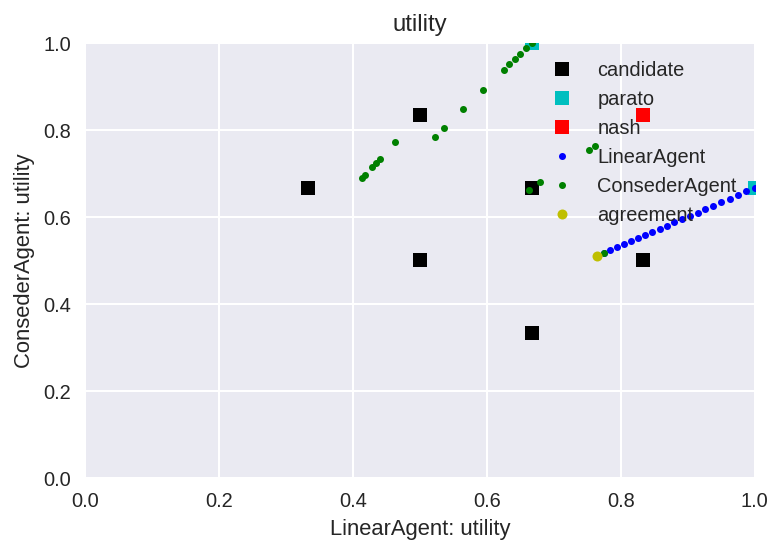

0

In [10]:
from jupiter.simulator import jupiter
%config InlineBackend.figure_format = 'retina'
jupiter.test(is_notebook=True)

------------------------------
start negotiation: 1


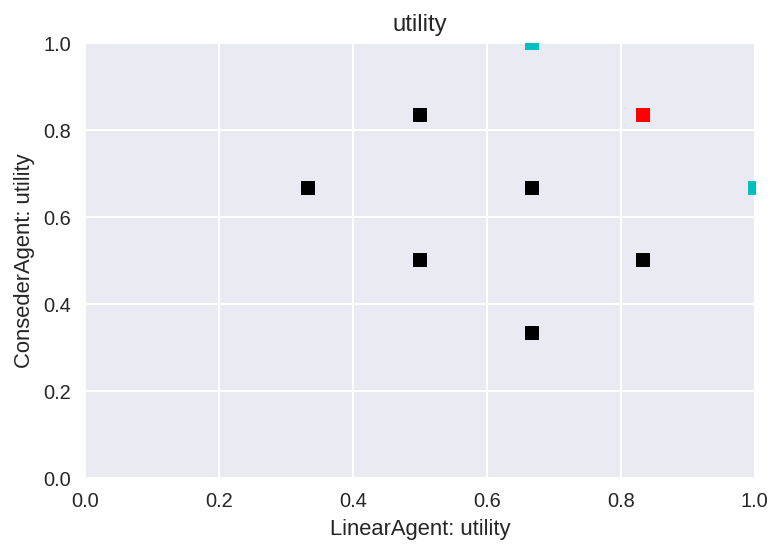

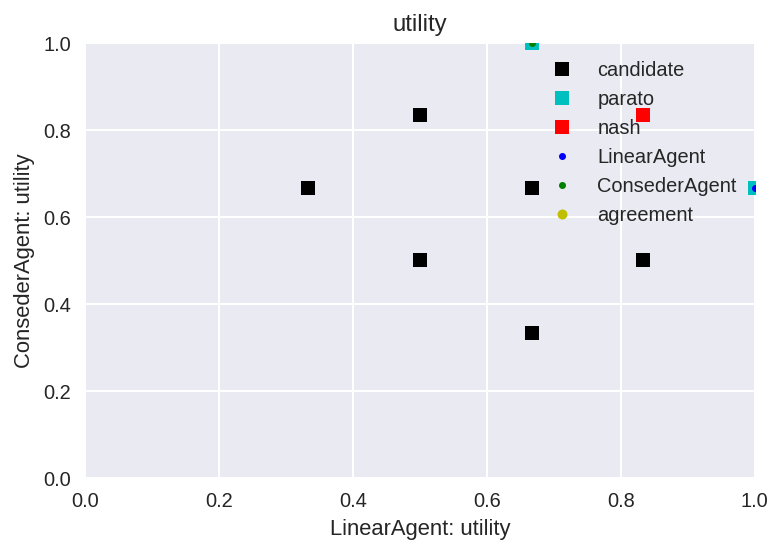

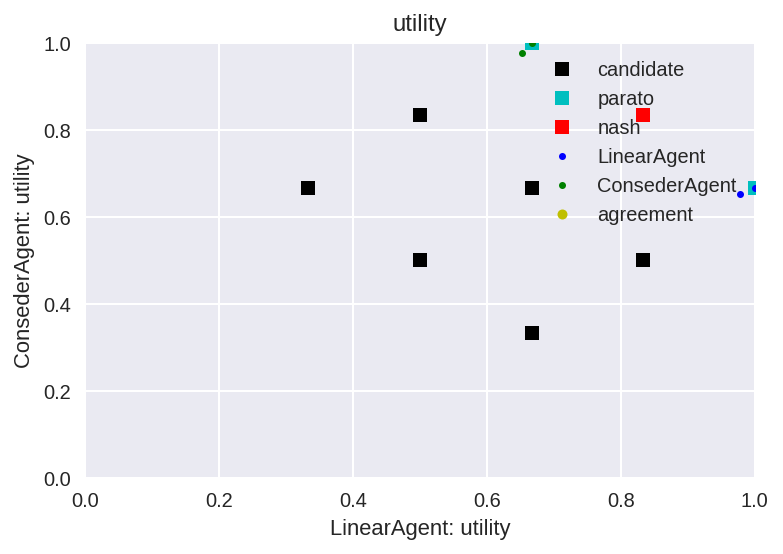

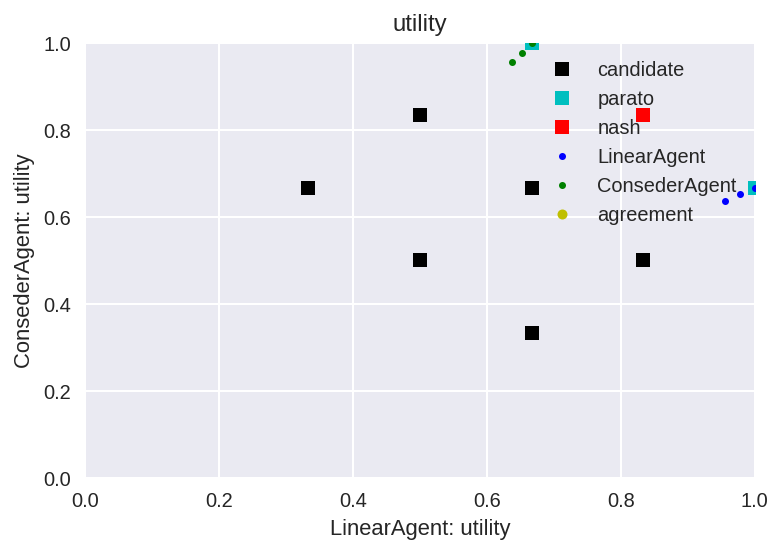

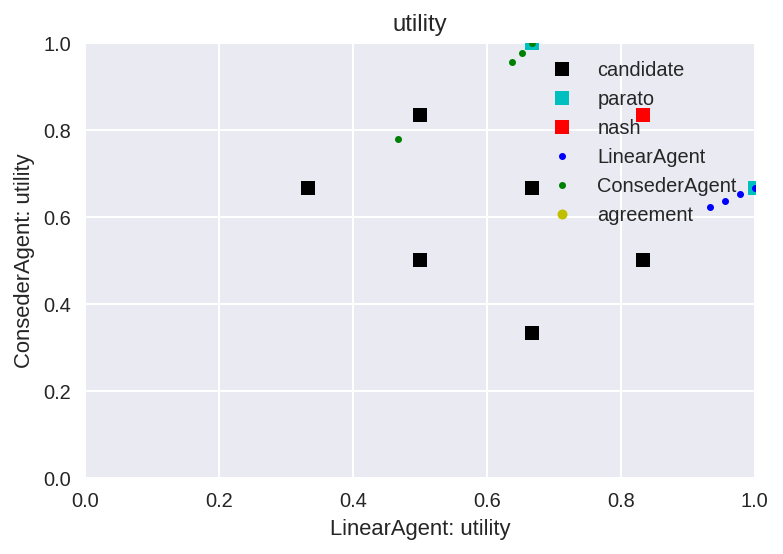

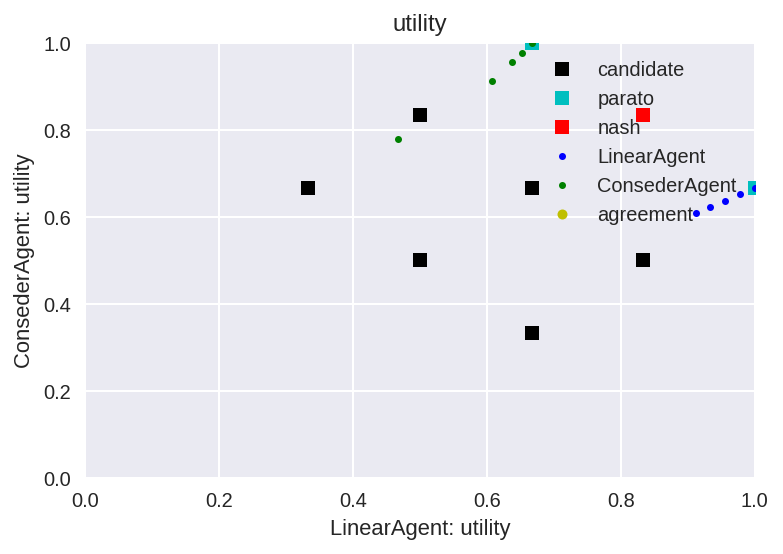

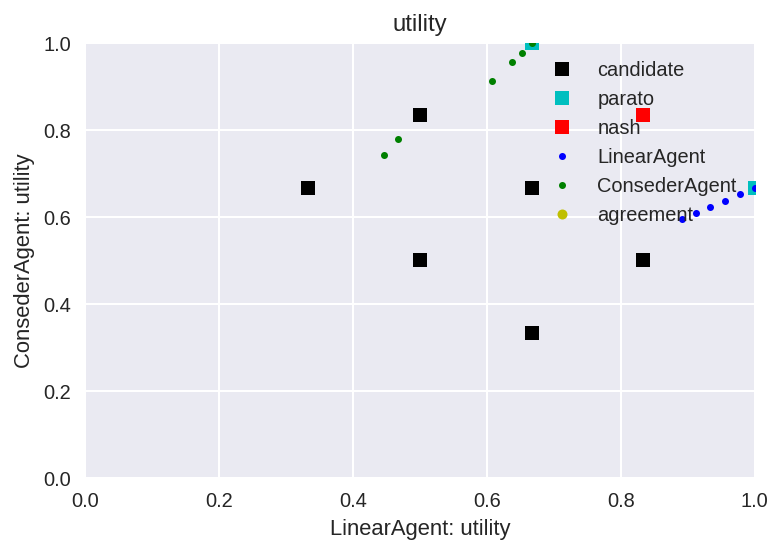

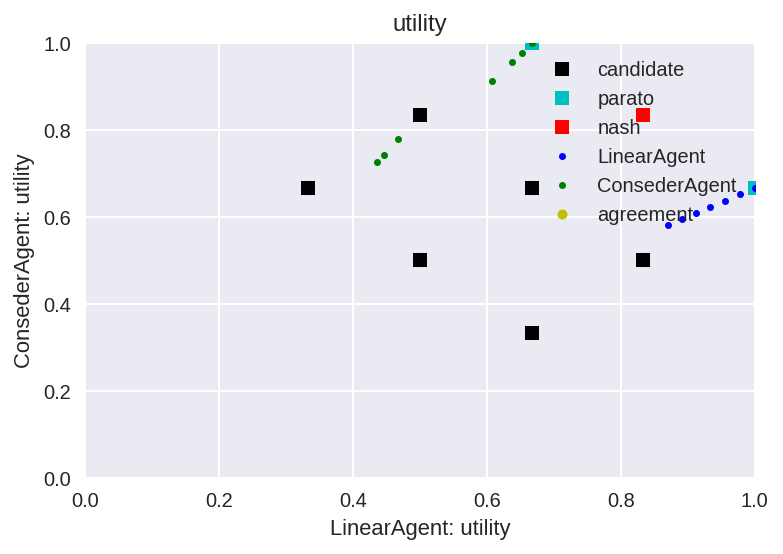

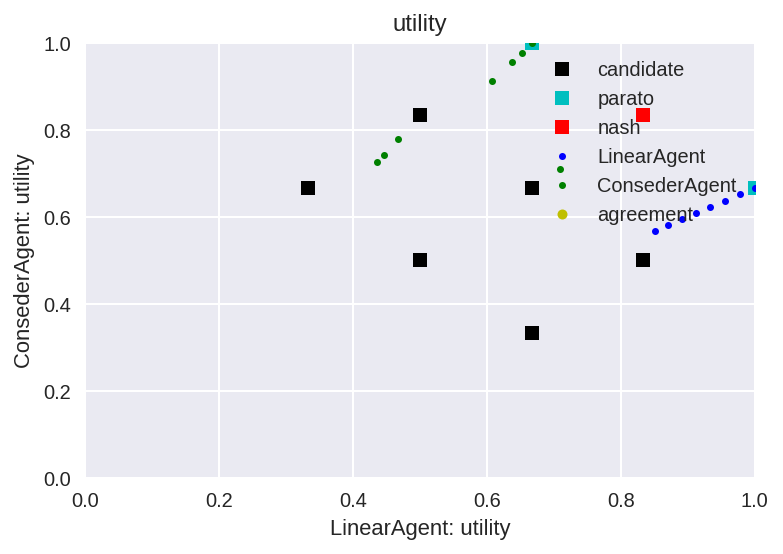

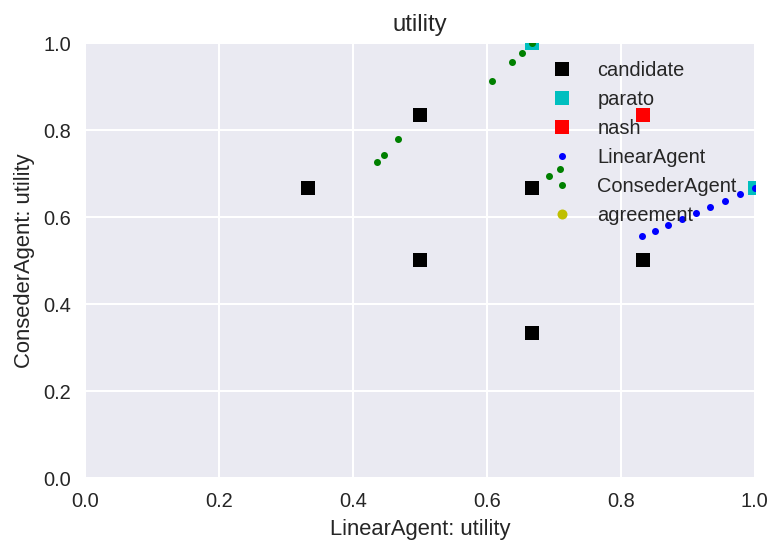

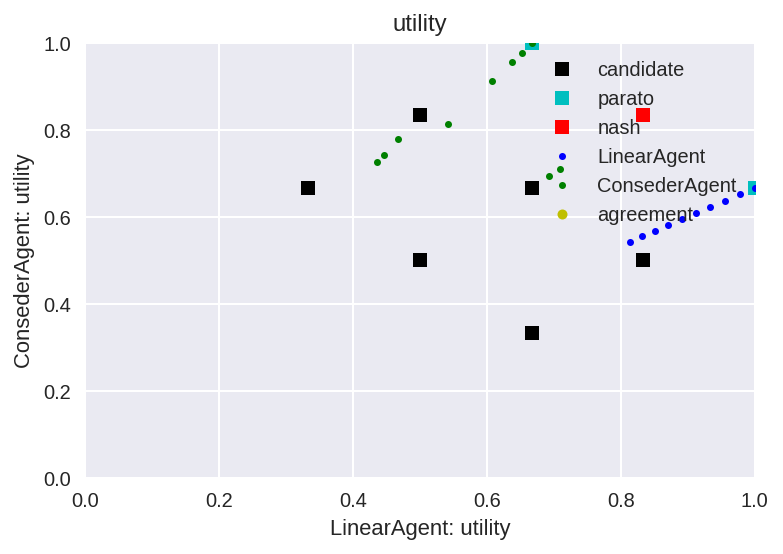

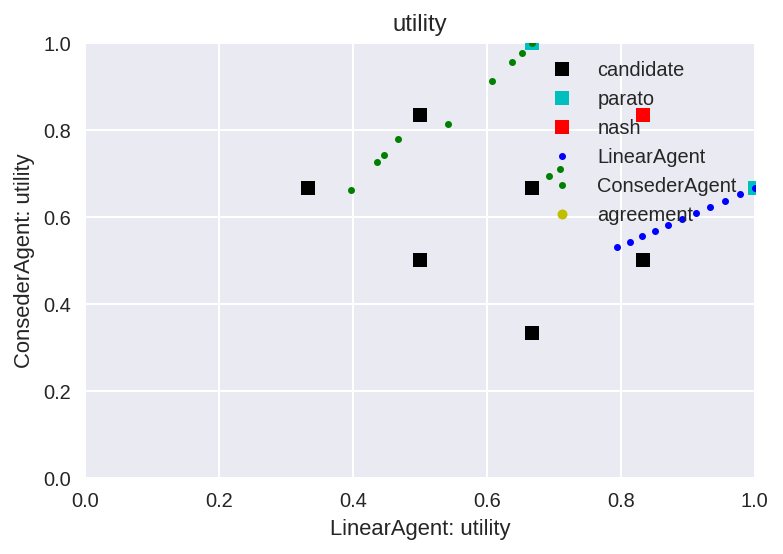

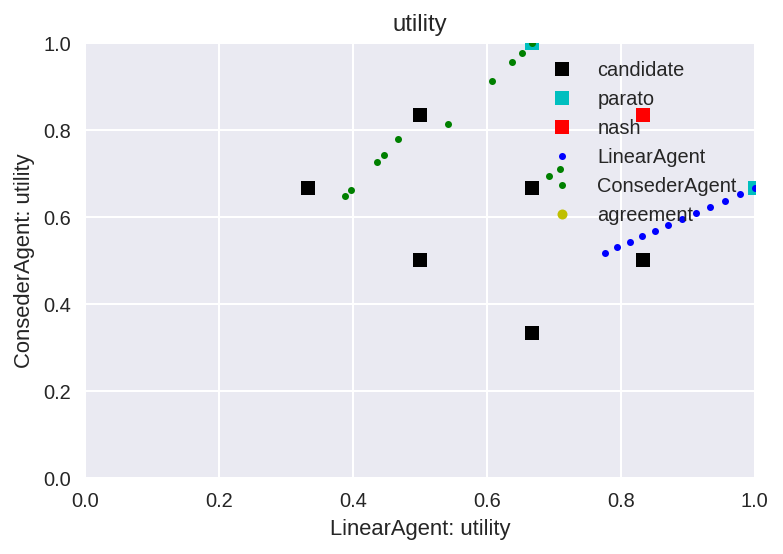

last turn: 0.12
agreement bid: [0, 0]
parato distance: 0.29015362
nash distance: 0.33603564
LinearAgent : 0.7585775750291838
ConsederAgent : 0.5057183833527892


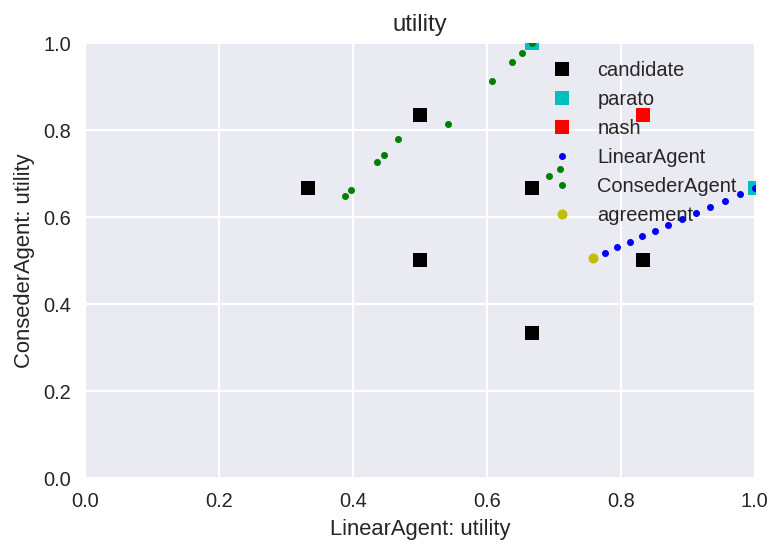

In [16]:
jupiter = Jupiter(negotiationRule.TypeOfNegotiation.Turn, 100, 
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight.xml',
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight_util1.xml',  
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight_util2.xml')  
import linearAgent
jupiter.set_agent(linearAgent, 'LinearAgent')
import concederAgent
jupiter.set_agent(concederAgent, 'ConcederAgent')

jupiter.set_notebook_flag()
%config InlineBackend.figure_format = 'retina'
jupiter.do_negotiation(is_printing=True, print_times=1)
jupiter.display.plot_initialize()
jupiter.display.plot2_notebook(jupiter.get_action_list_list()[-1],
                               jupiter.get_agreement_list()[-1])

In [28]:
jupiter = Jupiter(negotiationRule.TypeOfNegotiation.Turn, 30, 
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight.xml',
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight_util1.xml',  
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight_util2.xml',
                  '/content/drive/Itolab/Pythonシミュレーション/NegoScenarios/ANAC2016/Atlas3/triangularFight_util3.xml')
import linearAgent
jupiter.set_agent(linearAgent, 'LinearAgent')
import concederAgent
jupiter.set_agent(concederAgent, 'ConcederAgent')
import boulwareAgent
jupiter.set_agent(boulwareAgent, 'BoulwareAgent')

# repeat a negotiation 100 times.
for i in range(0, 100):
    jupiter.do_negotiation(is_printing=False)

------------------------------
start negotiation: 1
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500583
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.11381829579445338
BoulwareAgent : 0.34145488738336016
------------------------------
start negotiation: 2
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500583
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.11381829579445338
BoulwareAgent : 0.34145488738336016
------------------------------
start negotiation: 3
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500583
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.11381829579445338
BoulwareAgent : 0.34145488738336016
------------------------------
start negotiation: 4
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500583
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.113818

In [55]:
import pandas as pd
import json

results_list = str(jupiter.get_end_utility_list())
results_json = json.loads(results_list.replace('\'', '\"'))

results_csv  = pd.read_json(json.dumps(results_json))

results_csv

,BoulwareAgent,ConsederAgent,LinearAgent,agreement_bid,parato_distance
0,0.341455,0.113818,0.227637,"[2, 0]",0.650058
1,0.341455,0.113818,0.227637,"[2, 0]",0.650058
2,0.341455,0.113818,0.227637,"[2, 0]",0.650058
3,0.341455,0.113818,0.227637,"[2, 0]",0.650058
4,0.341455,0.113818,0.227637,"[2, 0]",0.650058
5,0.341455,0.113818,0.227637,"[2, 0]",0.650058
6,0.341455,0.113818,0.227637,"[2, 0]",0.650058
7,0.341455,0.113818,0.227637,"[2, 0]",0.650058
8,0.341455,0.113818,0.227637,"[2, 0]",0.650058
9,0.341455,0.113818,0.227637,"[2, 0]",0.650058


In [56]:
results_list2 = jupiter.get_agreement_list()
print(results_list2)

result_time_list = []
result_isAccepted_list = []
for result_list2 in results_list2:
  if (result_list2[0]): 
    # print("合意成功 ", end=" ")
    # print(result_list2[1].get_time_offered())
    result_isAccepted_list.append(True)
    result_time_list.append(result_list2[1].get_time_offered())
  else: 
    # print("合意失敗")
    result_isAccepted_list.append(False)
    result_time_list.append(result_list2[1].get_time_offered())



[[True, <jupiter.simulator.agentAction.Accept object at 0x7f13a7d41828>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a996a358>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a7b9b860>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a755c710>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a767f908>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a76ada58>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a7688be0>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a7698d30>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a76b5e80>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a76b3080>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a768a208>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a7699358>], [True, <jupiter.simulator.agentAction.Accept object at 0x7f13a76954e0>], [True, <jupiter.simulator.agentAction.Accept objec

In [26]:
results_list3 = str(jupiter.get_action_list_list())
print(results_list3)

[[<jupiter.simulator.agentAction.Offer object at 0x7f13abc98eb8>, <jupiter.simulator.agentAction.Offer object at 0x7f13abc98550>, <jupiter.simulator.agentAction.Offer object at 0x7f13abcedb00>, <jupiter.simulator.agentAction.Offer object at 0x7f13abceda58>, <jupiter.simulator.agentAction.Offer object at 0x7f13abced240>, <jupiter.simulator.agentAction.Offer object at 0x7f13aba7a588>, <jupiter.simulator.agentAction.Offer object at 0x7f13aba757f0>, <jupiter.simulator.agentAction.Offer object at 0x7f13aba75978>, <jupiter.simulator.agentAction.Offer object at 0x7f13aba6b400>, <jupiter.simulator.agentAction.Offer object at 0x7f13abcb5f60>, <jupiter.simulator.agentAction.Offer object at 0x7f13aba64fd0>, <jupiter.simulator.agentAction.Offer object at 0x7f13abc8e668>, <jupiter.simulator.agentAction.Offer object at 0x7f13aba28c50>, <jupiter.simulator.agentAction.Accept object at 0x7f13ab9c8da0>, <jupiter.simulator.agentAction.Offer object at 0x7f13ab9c8588>, <jupiter.simulator.agentAction.Offer 

In [57]:
results_csv['is accepted'] = result_isAccepted_list
results_csv['time'] = result_time_list

results_csv = results_csv.ix[:,[6,5,3,2,1,0,4]]
results_csv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,time,is accepted,agreement_bid,LinearAgent,ConsederAgent,BoulwareAgent,parato_distance
0,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
1,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
2,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
3,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
4,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
5,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
6,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
7,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
8,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
9,0.466667,True,"[2, 0]",0.227637,0.113818,0.341455,0.650058
